In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import *
from vectors import *

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [2]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx=speed*cos(pi*theta/180)
    vz=speed*sin(pi*theta/180)    
    t,x,z=0,0,height
    ts,xs,zs=[t],[x],[z]
    while z>=0:
        t+=dt
        vz+=g*dt
        x+=vx*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts,xs,zs

In [3]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs=traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices=[]
            second=0
            for i,t in enumerate(traj[0]):
                if t>=second:
                    second_indices.append(i)
                    second+=1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl=plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width=7
    coords_height=(plt.ylim()[1] - plt.ylim()[0])
    coords_width=(plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width, width*coords_height/coords_width)

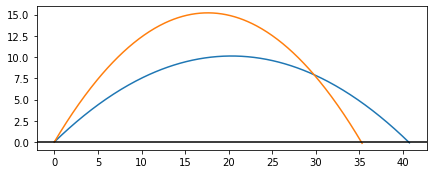

In [4]:
plot_trajectories(
    trajectory(45),
    trajectory(60)
)

In [5]:
def landing_position(traj):
    return traj[1][-1]

In [6]:
def hang_time(traj):
    return traj[0][-1]

In [7]:
def max_height(traj):
    return max(traj[2])

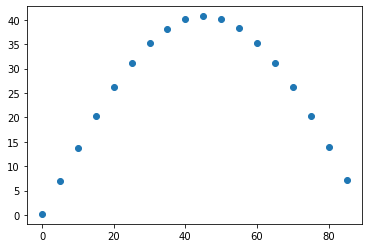

In [8]:
import matplotlib.pyplot as plt
angles=range(0,90,5)
landing_positions=[landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)

In [9]:
landing_position(trajectory(50))

40.10994684444007

In [10]:
landing_position(trajectory(130))

-40.10994684444007

In [11]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs=traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices=[]
            second=0
            for i,t in enumerate(traj[0]):
                if t>=second:
                    second_indices.append(i)
                    second+=1
            plt.scatter([xs[i] for i in second_indices],
                        [zs[i] for i in second_indices])
    xl=plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width=7
    coords_height=(plt.ylim()[1] - plt.ylim()[0])
    coords_width=(plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width, width*coords_height/coords_width)

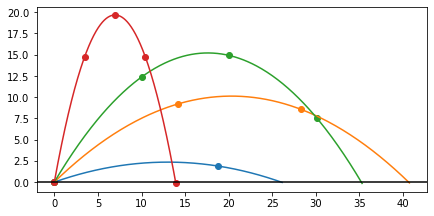

In [12]:
plot_trajectories(
    trajectory(20),
    trajectory(45),
    trajectory(60),
    trajectory(80),
    show_seconds=True
)

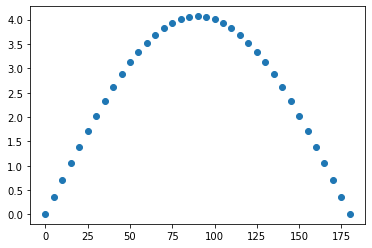

In [13]:
test_angles=range(0,181,5)
hang_times=[hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles,hang_times)

In [14]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,
               [metric(trajectory(theta,**settings))
               for theta in thetas])

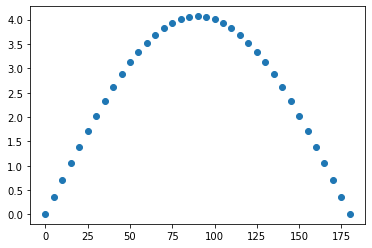

In [15]:
plot_trajectory_metric(hang_time,range(0,181,5))

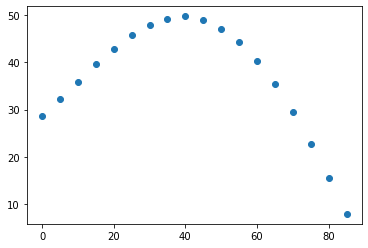

In [16]:
plot_trajectory_metric(landing_position,range(0,90,5),height=10)

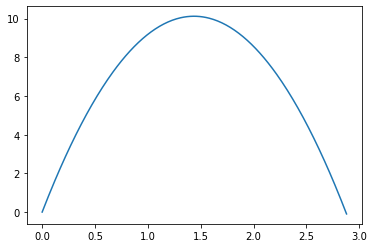

In [17]:
trj=trajectory(45)
ts,zs=trj[0],trj[2]
plt.plot(ts,zs)

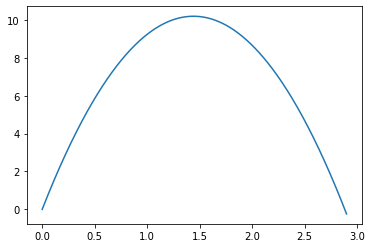

In [18]:
def z(t):
    return 20*sin(45*pi/180)*t+(-9.81/2)*t**2

plot_function(z,0,2.9)

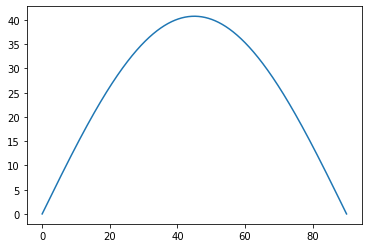

In [19]:
def r(theta):
    return (-2*20*20/-9.81*sin(theta*pi/180)*cos(theta*pi/180))

plot_function(r,0,90)

In [20]:
r(45)

40.774719673802245

In [21]:
r(135)

-40.77471967380224

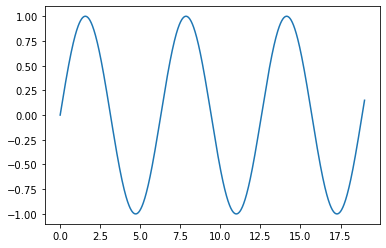

In [22]:
plot_function(sin,0,19)

In [23]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):
    vx=speed*cos(pi*theta/180)*cos(pi*phi/180)
    vy=speed*cos(pi*theta/180)*sin(pi*phi/180)
    vz=speed*sin(pi*theta/180)
    t,x,y,z=0,0,0,height
    ts,xs,ys,zs=[t],[x],[y],[z]
    while z>=0:
        t+=dt
        vz+=g*dt
        x+=vx*dt
        y+=vy*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts,xs,ys,zs

In [24]:
def flat_ground(x,y):
    return 0

In [25]:
def ridge(x,y):
    return (x**2-5*y**2)/2500

In [26]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx=speed*cos(pi*theta/180)*cos(pi*phi/180)
    vy=speed*cos(pi*theta/180)*sin(pi*phi/180)
    vz=speed*sin(pi*theta/180)
    t,x,y,z=0,0,0,height
    ts,xs,ys,zs=[t],[x],[y],[z]
    while z>=elevation(x,y):
        t+=dt
        vz+=g*dt
        x+=vx*dt
        y+=vy*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts,xs,ys,zs

In [27]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

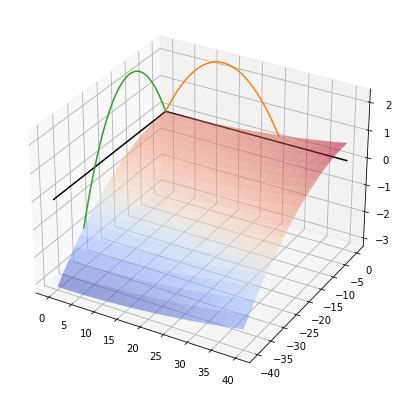

In [28]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge
)

In [29]:
B=0.0004
C=0.005
v=20
g=-9.81

def velocity_component(v,theta,phi):
    vx=v*cos(pi*theta/180)*cos(pi*phi/180)
    vy=v*cos(pi*theta/180)*sin(pi*phi/180)
    vz=v*sin(pi*theta/180)
    return vx,vy,vz

def landing_distance(theta,phi):
    vx,vy,vz=velocity_component(v,theta,phi)
    v_xy=sqrt(vx**2+vy**2)
    a=(g/2)-B*vx**2+C*vy**2
    b=vz
    landing_time=-b/a
    landing_distance=v_xy*landing_time
    return landing_distance

In [30]:
trajectory3d(30,240,elevation=ridge)

([0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.060000000000000005,
  0.07,
  0.08,
  0.09,
  0.09999999999999999,
  0.10999999999999999,
  0.11999999999999998,
  0.12999999999999998,
  0.13999999999999999,
  0.15,
  0.16,
  0.17,
  0.18000000000000002,
  0.19000000000000003,
  0.20000000000000004,
  0.21000000000000005,
  0.22000000000000006,
  0.23000000000000007,
  0.24000000000000007,
  0.25000000000000006,
  0.26000000000000006,
  0.2700000000000001,
  0.2800000000000001,
  0.2900000000000001,
  0.3000000000000001,
  0.3100000000000001,
  0.3200000000000001,
  0.3300000000000001,
  0.34000000000000014,
  0.35000000000000014,
  0.36000000000000015,
  0.37000000000000016,
  0.38000000000000017,
  0.3900000000000002,
  0.4000000000000002,
  0.4100000000000002,
  0.4200000000000002,
  0.4300000000000002,
  0.4400000000000002,
  0.45000000000000023,
  0.46000000000000024,
  0.47000000000000025,
  0.48000000000000026,
  0.49000000000000027,
  0.5000000000000002,
  0.5100000000000002,
 

limit_output extension: Maximum message size of 10000 exceeded with 19332 characters

In [31]:
landing_distance(30,240)

45.46065111729336

In [32]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground,drag=0):
    vx=speed*cos(pi*theta/180)*cos(pi*phi/180)
    vy=speed*cos(pi*theta/180)*sin(pi*phi/180)
    vz=speed*sin(pi*theta/180)
    t,x,y,z=0,0,0,height
    ts,xs,ys,zs=[t],[x],[y],[z]
    while z>=elevation(x,y):
        t+=dt
        vx-=(drag*vx)*dt
        vy-=(drag*vy)*dt
        vz+=(g-(drag*vz))*dt
        x+=vx*dt
        y+=vy*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts,xs,ys,zs

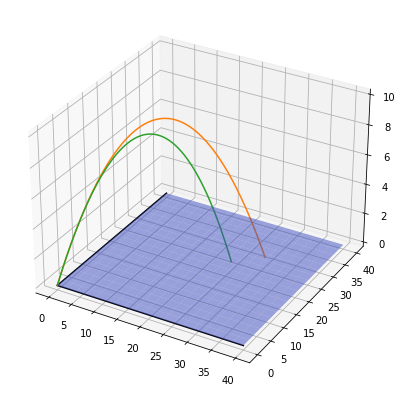

In [66]:
plot_trajectories_3d(
    trajectory3d(45,45,elevation=flat_ground),
    trajectory3d(45,45,elevation=flat_ground,drag=0.1),
    bounds=[0,40,0,40],
    elevation=flat_ground
)

In [34]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

<Figure size 504x504 with 0 Axes>

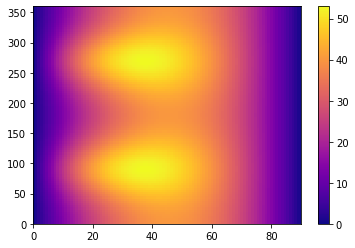

In [35]:
scalar_field_heatmap(landing_distance,0,90,0,360)

In [36]:
def secant_slope(f,xmin,xmax):
    return (f(xmax)-f(xmin))/(xmax-xmin)

In [37]:
def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [38]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x=approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y=approx_derivative(lambda y:f(x0,y),y0,dx=dx)    
    return (partial_x,partial_y)

In [39]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance,theta,phi)

In [40]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5, 
    head_length=tip_length/2,
    fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

<Figure size 504x504 with 0 Axes>

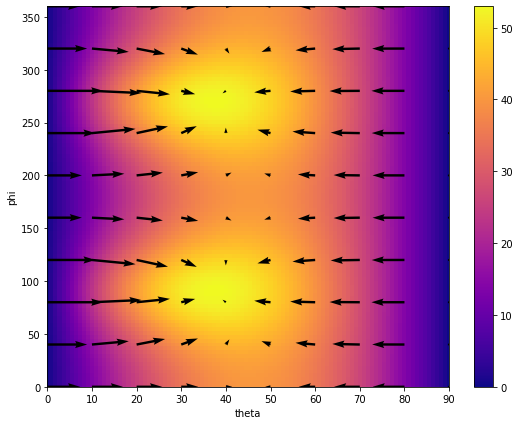

In [41]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 504x504 with 0 Axes>

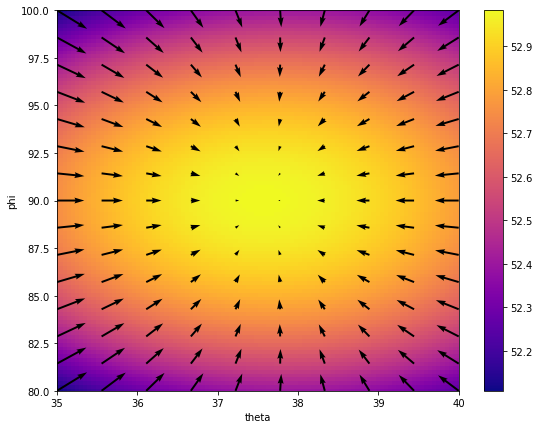

In [42]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [43]:
def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x=xstart
    y=ystart
    grad=approx_gradient(f,x,y)
    while length(grad)>tolerance:
        x+=grad[0]
        y+=grad[1]
        grad=approx_gradient(f,x,y)
    return x,y

In [44]:
gradient_ascent(landing_distance,36,83)

(37.58114747649905, 89.99991615950938)

In [45]:
def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x=xstart
    y=ystart
    xs,ys=[x],[y]
    grad=approx_gradient(f,x,y)
    while length(grad)>tolerance:
        x+=grad[0]
        y+=grad[1]
        grad=approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs,ys

<Figure size 504x504 with 0 Axes>

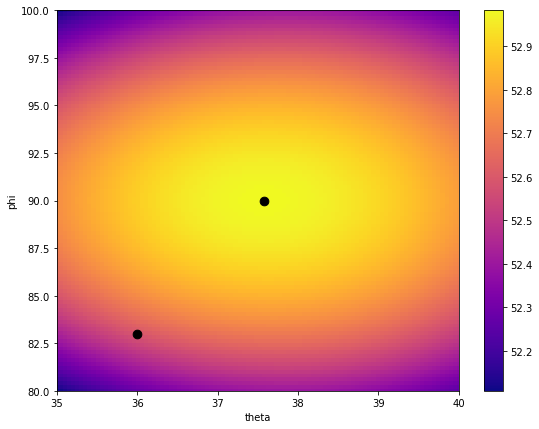

In [46]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 504x504 with 0 Axes>

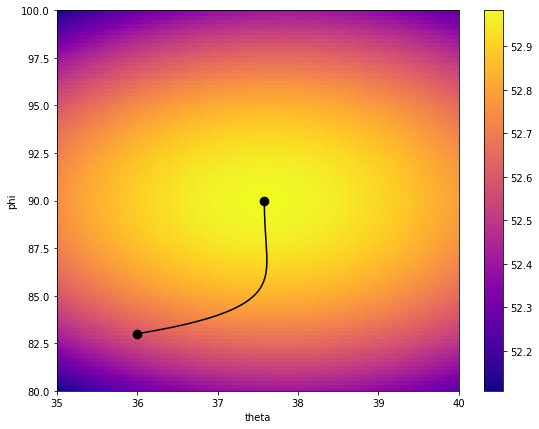

In [47]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [48]:
landing_distance(37.58114751557887,89.99992616039857)

52.983106893547415

上面： 52.98310689353923
下面： 52.983106893547415


<Figure size 504x504 with 0 Axes>

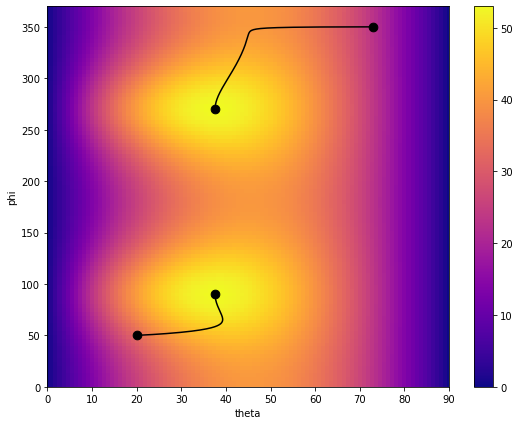

In [49]:
scalar_field_heatmap(landing_distance,0,90,0,370)

plt.scatter([73,37.58114749248622],[350,270.0000825846069],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,73,350),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

plt.scatter([20,37.58114751801379],[50,89.99991614885127],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,20,50),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

print("上面：",landing_distance(37.58114749248622,270.0000825846069))
print("下面：",landing_distance(37.58114751557887,89.99992616039857))

<Figure size 504x504 with 0 Axes>

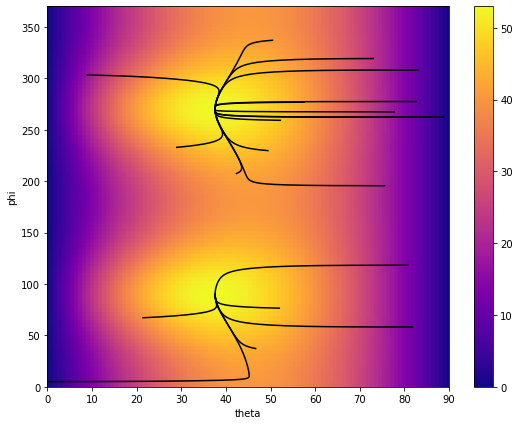

In [50]:
from random import uniform
scalar_field_heatmap(landing_distance,0,90,0,370)
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

for x in range(0,20):
    gap=gradient_ascent_points(landing_distance,uniform(0,90),uniform(0,360))
    plt.plot(*gap,c='k')

In [51]:
gradient_ascent(landing_distance,0,180)

(45.45974527814323, 180.0)

In [52]:
def gradient_ascent_points(f,xstart,ystart,rate=1,tolerance=1e-6):
    x=xstart
    y=ystart
    xs,ys=[x],[y]
    grad=approx_gradient(f,x,y)
    while length(grad)>tolerance:
        x+=rate*grad[0]
        y+=rate*grad[1]
        grad=approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs,ys

In [53]:
def count_ascent_steps(f,x,y,rate=1):
    gap=gradient_ascent_points(f,x,y,rate=rate)
    print(gap[0][-1],gap[1][-1])
    return len(gap[0])

In [54]:
count_ascent_steps(landing_distance,36,83)

37.58114747649905 89.99991615950938


940

In [55]:
count_ascent_steps(landing_distance,36,83,rate=1.5)

37.581147494262574 89.99991757526608


626

In [56]:
count_ascent_steps(landing_distance,36,83,rate=3)

37.581147483604425 89.99991862509304


311

In [57]:
count_ascent_steps(landing_distance,36,83,rate=10)

37.581147519131505 89.99991934629385


90

In [58]:
count_ascent_steps(landing_distance,36,83,rate=20)

37.581147590185786 89.9999304662877


43

<Figure size 504x504 with 0 Axes>

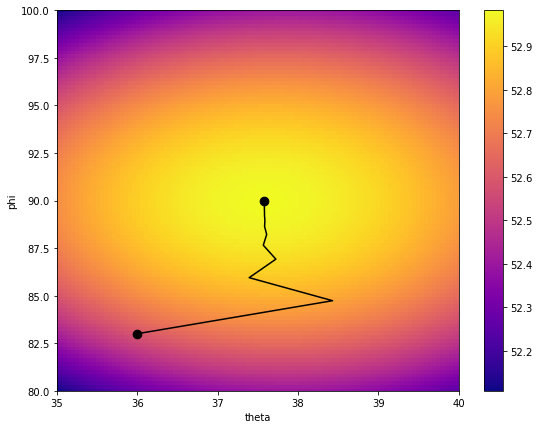

In [59]:
scalar_field_heatmap(landing_distance,35,40,80,100)

result=gradient_ascent_points(landing_distance,36,83,rate=20)
xs,ys=result[0],result[1]

plt.scatter([36,37.58114751801379],[83,89.99991614885127],c='k',s=75)
plt.plot(xs,ys,c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

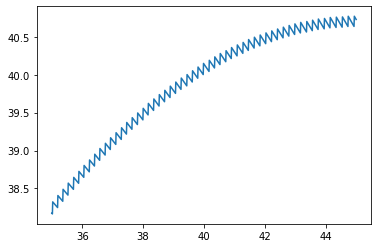

In [60]:
def simulated_distance_270(theta):
    ts,xs,ys,zs = trajectory3d(theta,270)
    return sqrt(xs[-1]**2 + ys[-1]**2)

plot_function(simulated_distance_270,35,45)